# PArticle filters examples

In [18]:
import numpy as np
import dask.array as da
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from  tfilterspy import DaskParticleFilter

In [ ]:
# import numpy as np
# import dask.array as da
# from sklearn.utils.validation import check_array, check_is_fitted

# class BaseEstimator:
#     """
#     Base class for all estimators in the TFilterPy package.
#     Provides common functionality such as parameter handling and validation.
#     """

#     def __init__(self, name=None):
#         """
#         Initialize the BaseEstimator.

#         Args:
#             name (str): Optional name for the estimator.
#         """
#         self.name = name or self.__class__.__name__

#     @staticmethod
#     def to_dask_array(numpy_array, chunk_size=None):
#         """
#         Convert a NumPy array to a Dask array with specified chunking.
#         If chunk_size is None, use Dask's automatic chunking.
        
#         Parameters:
#             numpy_array (np.ndarray): Input array.
#             chunk_size (int or tuple, optional): Desired chunk size.
            
#         Returns:
#             da.Array: Dask array version of numpy_array.
#         """
#         if chunk_size is None:
#             return da.from_array(numpy_array, chunks="auto")
#         else:
#             if isinstance(chunk_size, int):
#                 chunks = tuple(chunk_size for _ in range(numpy_array.ndim))
#             else:
#                 chunks = chunk_size
#             return da.from_array(numpy_array, chunks=chunks)
    
#     def get_params(self, deep=True):
#         """
#         Get parameters of the estimator.

#         Args:
#             deep (bool): If True, retrieves parameters of nested objects.

#         Returns:
#             dict: A dictionary of parameter names mapped to their values.
#         """
#         params = {}
#         for key, value in self.__dict__.items():
#             if deep and hasattr(value, "get_params"):
#                 deep_items = value.get_params().items()
#                 params.update({f"{key}__{k}": v for k, v in deep_items})
#             else:
#                 params[key] = value
#         return params

#     def set_params(self, **params):
#         """
#         Set parameters of the estimator.

#         Args:
#             **params: Arbitrary keyword arguments of parameters to set.

#         Returns:
#             self: Returns the instance itself.
#         """
#         for key, value in params.items():
#             if not hasattr(self, key):
#                 raise ValueError(f"Invalid parameter: {key}")
#             setattr(self, key, value)
#         return self

#     def validate_matrices(self, matrices):
#         """
#         Validate that matrices have consistent shapes and types.

#         Args:
#             matrices (dict): A dictionary of matrix names and their values.

#         Raises:
#             ValueError: If the matrices are inconsistent.
#         """
#         for name, matrix in matrices.items():
#             if not isinstance(matrix, (np.ndarray, da.Array)):
#                 raise ValueError(f"{name} must be a NumPy or Dask array.")
#             if matrix.ndim != 2:
#                 raise ValueError(f"{name} must be a 2D array.")
#             if matrix.dtype != np.float64:
#                 raise ValueError(f"{name} must have dtype float64.")
#         # Add shape consistency checks here if needed

#     def _validate_data(self, X, y=None, reset=True, validate_separately=False, **check_array_params):
#         """
#         Validate input data using sklearn.utils.validation.check_array.
#         """
#         if y is None:
#             X = check_array(X, reset=reset, validate_separately=validate_separately, **check_array_params)
#             return X
#         else:
#             X, y = check_array(X, y, reset=reset, validate_separately=validate_separately, **check_array_params)
#             return X, y

#     def _check_is_fitted(self, attributes, msg=None, all_or_any=all):
#         """
#         Check if the estimator is fitted.
#         """
#         check_is_fitted(self, attributes, msg=msg, all_or_any=all_or_any)

#     def __repr__(self):
#         """
#         String representation of the estimator.

#         Returns:
#             str: A string representation of the estimator.
#         """
#         return f"{self.name}({self.get_params(deep=False)})"

# import dask
# print(dask.__version__)

# import dask.array as da
# import numpy as np

# class ParameterEstimator(BaseEstimator):
#     r"""
#     A class for estimating Kalman Filter parameters, such as process noise covariance (Q)
#     and observation noise covariance (R), using different estimation methods.

#     Estimation strategies include:
#     - Residual Analysis
#     - Maximum Likelihood Estimation (MLE)
#     - Cross-Validation
#     - Adaptive Filtering

#     References:
#     - Welch, G., & Bishop, G. (1995). An Introduction to the Kalman Filter.
#     - Haykin, S. (2001). Kalman Filtering and Neural Networks.
#     """

#     def __init__(self, estimation_strategy: str = "residual_analysis"):
#         r"""
#         Initialize the ParameterEstimator with the desired estimation strategy.

#         Parameters
#         ----------
#         estimation_strategy : str, optional
#             The strategy to use for estimating parameters. Options include:
#             - "residual_analysis": Estimate based on residuals after running the filter.
#             - "mle": Maximum Likelihood Estimation (iterative approach).
#             - "cross_validation": Perform k-fold cross-validation for best Q and R.
#             - "adaptive_filtering": Dynamically update Q and R based on measurement residuals.

#         Raises
#         ------
#         ValueError
#             If an invalid estimation strategy is specified.
#         """
#         super().__init__(name="KalmanFilterParameterEstimator")
#         valid_strategies = {
#             "residual_analysis",
#             "mle",
#             "cross_validation",
#             "adaptive_filtering",
#         }
#         if estimation_strategy not in valid_strategies:
#             raise ValueError(
#                 f"Invalid strategy: {estimation_strategy}. Must be one of {valid_strategies}."
#             )
#         self.estimation_strategy = estimation_strategy

#     def estimate_with_residual_analysis(self, measurements: da.Array) -> tuple:
#         r"""
#         Estimate process (Q) and observation (R) noise covariances using residual analysis.
        
#         This method runs the Kalman filter on the provided measurements, computes the residuals,
#         and estimates the noise covariances based on their statistical properties.
        
#         Parameters
#         ----------
#         measurements : dask.array.Array
#             Array of shape (n_samples, n_observations) containing the measurement data.
        
#         Returns
#         -------
#         Q : dask.array.Array
#             Estimated process noise covariance matrix.
#         R : dask.array.Array
#             Estimated observation noise covariance matrix.
        
#         Notes
#         -----
#         - The process noise covariance (Q) is estimated as the covariance of the residuals.
#         - The observation noise covariance (R) is approximated as a diagonal matrix scaled
#           by the variance of the residuals.
#         - Dask's auto-chunking is used to handle large datasets efficiently.
#         """
#         state_estimates, residuals = self.run_filter(measurements)
#         Q = da.cov(residuals, rowvar=False)
#         # Use auto chunking for the identity matrix
#         R = da.eye(self.R.shape[0], chunks="auto") * da.var(residuals)
#         return Q, R

#     def estimate_with_mle(self, measurements: da.Array, max_iterations: int = 5) -> tuple:
#         r"""
#         Estimate Q and R using Maximum Likelihood Estimation (MLE) through an iterative approach.
        
#         This method iteratively refines the estimates of Q and R by running the Kalman filter
#         and updating the covariances based on the residuals until convergence or the maximum
#         number of iterations is reached.
        
#         Parameters
#         ----------
#         measurements : dask.array.Array
#             Array of shape (n_samples, n_observations) containing the measurement data.
#         max_iterations : int, optional
#             Maximum number of iterations for the MLE process. Default is 5.
        
#         Returns
#         -------
#         Q : dask.array.Array
#             Estimated process noise covariance matrix.
#         R : dask.array.Array
#             Estimated observation noise covariance matrix.
        
#         Notes
#         -----
#         - The method uses the variance of residuals to update Q and R in each iteration.
#         - Intermediate results are persisted to avoid recomputation overhead in Dask.
#         - Convergence is not explicitly checked; the loop runs for a fixed number of iterations.
#         """
#         Q, R = self.Q, self.R

#         for _ in range(max_iterations):
#             state_estimates, residuals = self.run_filter(measurements)
#             # Use "auto" chunking for the identity matrices
#             Q_new = da.eye(residuals.shape[1], chunks="auto") * da.var(residuals, axis=0)
#             R_new = da.eye(self.R.shape[0], chunks="auto") * da.var(residuals)
#             # Persist intermediate results to avoid recomputation overhead
#             Q, R = Q_new.persist(), R_new.persist()

#         return Q, R

#     def estimate_with_cross_validation(self, measurements: da.Array, k_folds: int = 5) -> tuple:
#         r"""
#         Estimate Q and R using k-fold cross-validation to find the best noise covariance parameters.
        
#         This method splits the data into k folds, trains the Kalman filter on k-1 folds, and
#         validates on the remaining fold. The Q and R pair with the lowest validation error is selected.
        
#         Parameters
#         ----------
#         measurements : dask.array.Array
#             Array of shape (n_samples, n_observations) containing the measurement data.
#         k_folds : int, optional
#             Number of folds for cross-validation. Default is 5.
        
#         Returns
#         -------
#         Q : dask.array.Array
#             Estimated process noise covariance matrix from the best fold.
#         R : dask.array.Array
#             Estimated observation noise covariance matrix from the best fold.
        
#         Notes
#         -----
#         - The validation score is the mean squared error between predicted and actual measurements.
#         - All folds are computed lazily using Dask and finalized with `da.compute`.
#         - The method assumes the data can be evenly divided into folds; edge cases may need adjustment.
#         """
#         n_samples = measurements.shape[0]
#         fold_size = n_samples // k_folds

#         fold_scores, fold_Qs, fold_Rs = [], [], []

#         for fold in range(k_folds):
#             val_start = fold * fold_size
#             val_end = val_start + fold_size
#             train_data = da.concatenate([measurements[:val_start], measurements[val_end:]])
#             val_data = measurements[val_start:val_end]

#             state_estimates, residuals = self.run_filter(train_data)
#             val_score = da.mean((val_data - state_estimates[:fold_size]) ** 2)
#             fold_scores.append(val_score)

#             Q_fold = da.cov(residuals.T)
#             R_fold = da.eye(self.R.shape[0], chunks="auto") * da.var(residuals)
#             fold_Qs.append(Q_fold)
#             fold_Rs.append(R_fold)

#         # Compute all folds lazily and choose the best fold
#         fold_scores, fold_Qs, fold_Rs = da.compute(fold_scores, fold_Qs, fold_Rs)
#         best_fold = np.argmin(fold_scores)
#         return fold_Qs[best_fold], fold_Rs[best_fold]

#     def estimate_with_adaptive_filtering(self, measurements: da.Array, alpha: float = 0.01) -> tuple:
#         r"""
#         Estimate Q and R adaptively based on innovations over time using a smoothing approach.
        
#         This method dynamically updates the noise covariances by incorporating new information
#         from the innovations (measurement residuals) with a small learning rate.
        
#         Parameters
#         ----------
#         measurements : dask.array.Array
#             Array of shape (n_samples, n_observations) containing the measurement data.
#         alpha : float, optional
#             Number of folds for cross-validation. Default is 5.
        
        
#         Returns
#         -------
#         Q : dask.array.Array
#             Estimated process noise covariance matrix.
#         R : dask.array.Array
#             Estimated observation noise covariance matrix.
        
#         Notes
#         -----
#         - Innovations are calculated as the difference between measurements and predicted observations.
#         - The update uses an exponential moving average with a fixed alpha (learning rate) of 0.01.
#         - Dask's `einsum` is used for efficient outer product computation of innovations.
#         """
#         Q, R = self.Q, self.R
#         # alpha = 0.01
#         innovations = measurements - da.dot(self.H, self.x)
#         outer_products = da.einsum("ij,ik->ijk", innovations, innovations)
#         Q_new = da.mean(outer_products, axis=0).rechunk("auto")
#         R_new = da.var(innovations, axis=0).rechunk("auto")

#         Q = (1 - alpha) * Q + alpha * Q_new
#         R = (1 - alpha) * R + alpha * R_new
#         return Q, R

#     def estimate_parameters(self, measurements: da.Array):
#         r"""
#         Estimate the parameters Q and R using the specified estimation strategy.
        
#         This method serves as a dispatcher, calling the appropriate estimation method based
#         on the initialized `estimation_strategy`.
        
#         Parameters
#         ----------
#         measurements : dask.array.Array
#             Array of shape (n_samples, n_observations) containing the measurement data.
        
#         Returns
#         -------
#         tuple
#             A tuple (Q, R) containing the estimated process and observation noise covariance matrices.
#         """
#         return getattr(self, f"estimate_with_{self.estimation_strategy}")(measurements)


# import numpy as np
# import dask.array as da
# # from tfilterspy.utils.optimisation_utils import ParameterEstimator



# class DaskParticleFilter(ParameterEstimator):
#     r"""
#     A multivariate, scalable particle filter using Dask. Inherits parameter estimation 
#     methods from ParameterEstimator.
    
#     This implementation provides a flexible particle filter that can operate with either NumPy 
#     or Dask arrays, making it suitable for both small-scale and large-scale state estimation 
#     problems. It follows the standard sequential importance resampling (SIR) framework.
    
#     References
#     ----------
#     - Gordon,.ConcurrentN. J., Salmond, D. J., & Smith, A. F. M. (1993). Novel approach to nonlinear/non-Gaussian 
#         Bayesian state estimation. IEE Proceedings F - Radar and Signal Processing, 140(2), 107-113.
#     - Doucet, A., & Johansen, A. M. (2009). A tutorial on particle filtering and smoothing: 
#         Fifteen years later. Handbook of Nonlinear Filtering, 12(656-704).
#     """
#     def __init__(self, state_transition, observation_model, process_noise_cov, 
#                  observation_noise_cov, initial_state, num_particles=1000, use_dask=True, 
#                  estimation_strategy="residual_analysis"):
#         r"""
#         Initialize the DaskParticleFilter with filter parameters and estimation strategy.
        
#         Parameters
#         ----------
#         state_transition : array-like
#             State transition matrix of shape (state_dim, state_dim) defining the linear 
#             dynamics of the system.
#         observation_model : array-like
#             Observation matrix of shape (obs_dim, state_dim) mapping states to observations.
#         process_noise_cov : array-like
#             Process noise covariance matrix of shape (state_dim, state_dim).
#         observation_noise_cov : array-like
#             Observation noise covariance matrix of shape (obs_dim, obs_dim).
#         initial_state : array-like
#             Initial state vector of shape (state_dim,).
#         num_particles : int, optional
#             Number of particles to use in the filter. Default is 1000.
#         use_dask : bool, optional
#             If True, use Dask arrays for scalable computation; otherwise, use NumPy arrays. 
#             Default is True.
#         estimation_strategy : str, optional
#             Strategy for estimating Q and R, inherited from ParameterEstimator. Options include 
#             "residual_analysis", "mle", "cross_validation", "adaptive_filtering". Default is 
#             "residual_analysis".
        
#         Notes
#         -----
#         - The filter assumes a linear state transition and observation model. For nonlinear 
#           models, consider extending with callable functions (see Doucet & Johansen, 2009).
#         - When `use_dask` is True, inputs are converted to Dask arrays with chunking for 
#           scalability.
#         """
#         # Initialize the ParameterEstimator
#         super().__init__(estimation_strategy=estimation_strategy)
#         self.use_dask = use_dask
#         self.state_dim = initial_state.shape[0]
#         self.num_particles = num_particles

#         # Convert inputs to Dask arrays if scalability is desired
#         if self.use_dask:
#             self.state_transition = da.from_array(state_transition, chunks=state_transition.shape)
#             self.observation_model = da.from_array(observation_model, chunks=observation_model.shape)
#             self.process_noise_cov = da.from_array(process_noise_cov, chunks=process_noise_cov.shape)
#             self.observation_noise_cov = da.from_array(observation_noise_cov, chunks=observation_noise_cov.shape)
#             self.initial_state = da.from_array(initial_state, chunks=initial_state.shape)
#         else:
#             self.state_transition = state_transition
#             self.observation_model = observation_model
#             self.process_noise_cov = process_noise_cov
#             self.observation_noise_cov = observation_noise_cov
#             self.initial_state = initial_state

#         # Step 1: Initialization - all particles start at the same known state
#         particles_np = np.repeat(initial_state.reshape(1, self.state_dim), num_particles, axis=0)
#         if self.use_dask:
#             self.particles = da.from_array(particles_np, chunks=(num_particles // 10, self.state_dim))
#         else:
#             self.particles = particles_np
        
#         # Uniform weights
#         weights_np = np.ones(num_particles) / num_particles
#         if self.use_dask:
#             self.weights = da.from_array(weights_np, chunks=(num_particles // 10,))
#         else:
#             self.weights = weights_np

#         # Current state estimate (initially set to the initial state)
#         self.state = self.initial_state.compute() if self.use_dask else self.initial_state

#         # For parameter estimation methods, we store a copy of Q and R (could be updated later)
#         # For demonstration, we initialize them as given.
#         self.Q = self.process_noise_cov
#         self.R = self.observation_noise_cov

#     def predict(self):
#         r"""
#             Propagate each particle forward using the state transition model and Gaussian process noise.
            
#             This step implements the prediction phase of the particle filter, where particles are 
#             evolved according to the system dynamics plus random noise.
            
#             Notes
#             -----
#             - Noise is sampled from a multivariate normal distribution with covariance `Q`.
#             - For Dask, particles are persisted to optimize memory usage in distributed settings.
#             - See Gordon et al. (1993) for the foundational SIR algorithm's prediction step.
            
#             References
#             ----------
#             - Gordon, N. J., Salmond, D. J., & Smith, A. F. M. (1993). Novel approach to nonlinear/non-Gaussian 
#               Bayesian state estimation. IEE Proceedings F - Radar and Signal Processing, 140(2), 107-113.
#         """
#         noise_np = np.random.multivariate_normal(
#             np.zeros(self.state_dim),
#             self.process_noise_cov.compute() if self.use_dask else self.process_noise_cov,
#             self.num_particles
#         )
#         if self.use_dask:
#             noise = da.from_array(noise_np, chunks=self.particles.chunksize)
#         else:
#             noise = noise_np
        
#         if self.use_dask:
#             self.particles = da.dot(self.particles, self.state_transition.T) + noise
#             self.particles = self.particles.persist()
#         else:
#             self.particles = (self.state_transition @ self.particles.T).T + noise

#     def update(self, measurement):
#         r"""
#             Update particle weights based on the likelihood of the observed measurement.
            
#             This step computes the likelihood of each particle given the measurement and updates 
#             their weights accordingly, followed by resampling and state estimation.
            
#             Parameters
#             ----------
#             measurement : array-like
#                 Observed measurement vector of shape (obs_dim,).
            
#             Notes
#             -----
#             - Assumes a scalar observation noise variance (R[0, 0]) for simplicity. For multivariate 
#               observations, extend to use the full covariance matrix (Doucet & Johansen, 2009).
#             - Adds a small constant (1e-300) to weights to prevent degeneracy.
#             - Triggers resampling to mitigate particle impoverishment.
            
#             References
#             ----------
#             - Doucet, A., & Johansen, A. M. (2009). A tutorial on particle filtering and smoothing: 
#               Fifteen years later. Handbook of Nonlinear Filtering, 12(656-704).
#         """
#         if self.use_dask and not isinstance(measurement, da.Array):
#             measurement = da.from_array(measurement, chunks=measurement.shape)
        
#         if self.use_dask:
#             predicted_measurements = da.dot(self.particles, self.observation_model.T)
#         else:
#             predicted_measurements = (self.observation_model @ self.particles.T).T
        
#         diff = predicted_measurements - measurement
        
#         R_val = self.observation_noise_cov[0, 0].compute() if self.use_dask else self.observation_noise_cov[0, 0]
#         if self.use_dask:
#             likelihood = da.exp(-0.5 * da.sum(diff**2, axis=1) / R_val)
#         else:
#             likelihood = np.exp(-0.5 * np.sum(diff**2, axis=1) / R_val)
        
#         self.weights = self.weights * likelihood
#         self.weights = self.weights + 1e-300  # Avoid zero weights
#         self.weights = self.weights / self.weights.sum()
        
#         self.resample()
#         self.estimate_state()

#     def resample(self):
#         r"""
#             Resample particles to refocus on high-probability regions using multinomial resampling.
            
#             This step addresses particle degeneracy by resampling particles proportional to their 
#             weights, then resetting weights to uniform values.
            
#             Notes
#             -----
#             - Uses multinomial resampling, which is simple but can be less efficient than systematic 
#               resampling (Gordon et al., 1993).
#             - For Dask, requires computing weights and particles, which may limit scalability; 
#               consider stratified or systematic resampling for large-scale applications.
            
#             References
#             ----------
#             - Gordon, N. J., Salmond, D. J., & Smith, A. F. M. (1993). Novel approach to nonlinear/non-Gaussian 
#               Bayesian state estimation. IEE Proceedings F - Radar and Signal Processing, 140(2), 107-113.
#         """
#         weights_np = self.weights.compute() if self.use_dask else self.weights
#         indices = np.random.choice(np.arange(self.num_particles), size=self.num_particles, p=weights_np)
#         if self.use_dask:
#             particles_np = self.particles.compute()
#             particles_resampled = particles_np[indices]
#             self.particles = da.from_array(particles_resampled, chunks=self.particles.chunksize)
#             self.weights = da.from_array(np.ones(self.num_particles) / self.num_particles, chunks=self.weights.chunksize)
#         else:
#             self.particles = self.particles[indices]
#             self.weights = np.ones(self.num_particles) / self.num_particles

#     def estimate_state(self):
#         r"""
#             Compute the state estimate as the weighted average of particles.
            
#             This step provides the final state estimate after updating and resampling, representing 
#             the expected state given the current particle distribution.
            
#             Notes
#             -----
#             - For Dask, the estimate is computed immediately to provide a concrete result; for lazy 
#               evaluation, consider returning a Dask array instead.
#             - The weighted average is a common estimator in particle filtering (Doucet & Johansen, 2009).
            
#             References
#             ----------
#             - Doucet, A., & Johansen, A. M. (2009). A tutorial on particle filtering and smoothing: 
#               Fifteen years later. Handbook of Nonlinear Filtering, 12(656-704).
#         """
#         if self.use_dask:
#             self.state = da.average(self.particles, weights=self.weights, axis=0).compute()
#         else:
#             self.state = np.average(self.particles, weights=self.weights, axis=0)

#     def step(self, measurement):
#         r"""
#             Run one full filter cycle: predict, update, resample, and state estimation.
            
#             This method encapsulates a single iteration of the particle filter, processing one 
#             measurement and returning the updated state estimate.
            
#             Parameters
#             ----------
#             measurement : array-like
#                 Observed measurement vector of shape (obs_dim,).
            
#             Returns
#             -------
#             state : ndarray
#                 Estimated state vector of shape (state_dim,).
            
#             Notes
#             -----
#             - Combines the prediction and update steps as per the SIR framework (Gordon et al., 1993).
#         """
#         self.predict()
#         self.update(measurement)
#         return self.state

#     def run_filter(self, measurements):
#         r"""
#             Run the particle filter over a sequence of measurements and return state estimates and residuals.
            
#             This method is required for parameter estimation routines inherited from ParameterEstimator. 
#             It processes a time series of measurements sequentially and computes residuals for parameter tuning.
            
#             Parameters
#             ----------
#             measurements : array-like
#                 Array of measurements over time, shape (n_timesteps, obs_dim).
            
#             Returns
#             -------
#             state_estimates : da.Array or ndarray
#                 Filtered state estimates, shape (n_timesteps, state_dim).
#             residuals : da.Array or ndarray
#                 Residuals (measurement - predicted_measurement), shape (n_timesteps, obs_dim).
            
#             Notes
#             -----
#             - For simplicity, this implementation runs sequentially; for scalability, consider vectorizing 
#               with Dask operations (Doucet & Johansen, 2009).
#             - Residuals are computed as the difference between actual and predicted measurements, useful 
#               for covariance estimation.
#         """
#         n_timesteps = measurements.shape[0]
#         state_estimates = []
#         residuals = []
#         for i in range(n_timesteps):
#             meas = measurements[i]
#             # Predict and update for current measurement
#             self.step(meas)
#             state_estimates.append(self.state)
#             # Compute predicted measurement from the current state estimate
#             if self.use_dask:
#                 pred_meas = da.dot(da.from_array(self.state, chunks=self.state.shape), self.observation_model.T).compute()
#             else:
#                 pred_meas = self.observation_model @ self.state
#             # Residual is difference between actual measurement and predicted measurement
#             res = (meas.compute() if self.use_dask else meas) - pred_meas
#             residuals.append(res)
#         # Convert lists to dask arrays (or numpy arrays)
#         state_estimates = da.from_array(np.vstack(state_estimates)) if self.use_dask else np.vstack(state_estimates)
#         residuals = da.from_array(np.vstack(residuals)) if self.use_dask else np.vstack(residuals)
#         return state_estimates, residuals


_______

---

# Using Particle Filters for Image Denoising

## Purpose
Particle Filters denoise images by estimating the true pixel intensities from noisy observations. Unlike Kalman Filters, they handle non-Gaussian noise and nonlinear dynamics, making them versatile for complex image noise (e.g., synthetic Gaussian noise in digits). The goal is to recover clean images for better visualization or classification.

- **Why Particle Filters?** They use a set of particles (samples) to represent the state distribution, robustly filtering noise without strict linearity assumptions.

## Methodology
For images (e.g., 8x8 digits flattened to 64D vectors):
1. **Model the Image**: Treat pixel intensities as a state vector, evolving with a transition model (e.g., static).
2. **Add Noise**: Observations are corrupted by noise (e.g., Gaussian).
3. **Filter**: Propagate particles, update weights with observations, resample, and estimate the state.

### Key Equations
1. **State Transition (Prediction)**:
   - \( x_k^i = F x_{k-1}^i + w_k^i \), \( i = 1, ..., N \)
   - \( x_k^i \): State of particle \( i \) at time \( k \) (64D pixel vector).
   - \( F \): Transition matrix (e.g., \( I \) for static states).
   - \( w_k^i \sim \mathcal{N}(0, Q) \): Process noise, covariance \( Q \) (64x64).
   - \( N \): Number of particles (e.g., 1000).

2. **Observation Model**:
   - \( z_k = H x_k^i + v_k^i \)
   - \( z_k \): Noisy observation (noisy image pixels).
   - \( H \): Observation matrix (e.g., \( I \) for direct observation).
   - \( v_k^i \sim \mathcal{N}(0, R) \): Observation noise, covariance \( R \) (64x64).

3. **Weight Update**:
   - \( w_k^i \propto p(z_k | x_k^i) = \exp\left(-\frac{1}{2} (z_k - H x_k^i)^T R^{-1} (z_k - H x_k^i)\right) \)
   - Normalize: \( w_k^i = w_k^i / \sum_{j=1}^N w_k^j \).

4. **Resampling**:
   - Resample \( N \) particles from \( \{x_k^i\} \) with probabilities \( \{w_k^i\} \).

5. **State Estimation**:
   - \( \hat{x}_k = \frac{1}{N} \sum_{i=1}^N x_k^i \) (or weighted average before resampling).

## How to Use (Based on Your Code)
1. **Prepare Data**:
   - Load images (e.g., digits: 20 samples, 8x8 pixels flattened to 64D).
   - Split into train/test: `x_train, x_test = train_test_split(x, test_size=0.2)`.
   - Convert to Dask: `x_train_dask = da.from_array(x_train, chunks=(10, 64))`.
   - Add noise: `noisy_x_train_dask = x_train_dask + da.random.normal(0, 0.88, ...)`.

2. **Set Up Particle Filter**:
   - Define parameters:
     - \( F = I_{64} \) (static transition).
     - \( H = I_{64} \) (direct observation).
     - \( Q = 0.01 \cdot I_{64} \) (process noise).
     - \( R = 0.1 \cdot I_{64} \) (observation noise).
     - \( x_0 = \) first clean image (initial state).
   - Initialize: `pf = DaskParticleFilter(F, H, Q, R, initial_state, num_particles=1000, use_dask=True)`.

3. **Denoise**:
   - Run filter on training data: `train_states, _ = pf.run_filter(noisy_x_train_dask)`.
   - Compute: `denoised_x_train = train_states.compute()`.
   - Repeat for test data with reinitialized filter.

4. **Evaluate**:
   - Compute MSE: `mse = np.mean((x_train - denoised_x_train) ** 2)`.
   - Visualize: Original, noisy, and denoised images.
   - Classify: Train logistic regression on denoised data and check accuracy.

## Example Output
- **MSE**: Measures denoising quality (e.g., Train MSE: 0.1234, Test MSE: 0.1356).
- **Visualization**: Original (clean), Noisy (distorted), Denoised (restored) for 4 samples.
- **Accuracy**: Classification performance on denoised data (e.g., 0.75).

## Notes
- **Flexibility**: Handles non-Gaussian noise better than Kalman Filters.
- **Scalability**: Dask enables large datasets with chunking (e.g., 10x64).
- **Tuning**: Adjust \( Q \), \( R \), and `num_particles` for noise level and accuracy trade-off.
- **Limitation**: Computationally intensive; more particles improve accuracy but increase cost.

---

____

Train MSE: 31.7266
Test MSE: 34.3770


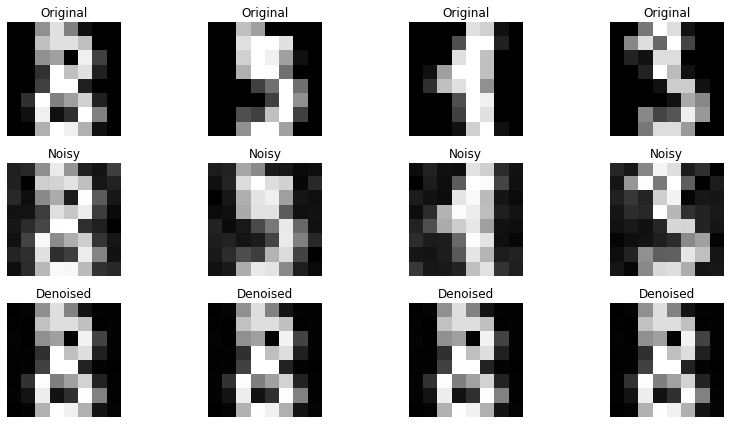

Classification Accuracy: 0.0000


In [14]:
import numpy as np
import dask.array as da
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# from your_module import DaskParticleFilter  # Adjust import

# Load and split the digits dataset (20 samples)
digits = load_digits()
x = digits.data[0:20]  # Shape: (20, 64)
y = digits.target[0:20]  # Shape: (20,)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert to Dask arrays
x_train_dask = da.from_array(x_train, chunks=(10, 64))  # 16 samples
x_test_dask = da.from_array(x_test, chunks=(10, 64))    # 4 samples
y_train_dask = da.from_array(y_train, chunks=(10,))
y_test_dask = da.from_array(y_test, chunks=(10,))

# Add synthetic noise
noise_level = 0.88
noisy_x_train_dask = x_train_dask + da.random.normal(0, noise_level, x_train_dask.shape, chunks=x_train_dask.chunks)
noisy_x_test_dask = x_test_dask + da.random.normal(0, noise_level, x_test_dask.shape, chunks=x_test_dask.chunks)

# Particle Filter Setup
n_features = 64  # 8x8 pixels
F = np.eye(n_features)  # Static transition
H = np.eye(n_features)  # Direct observation
Q = np.eye(n_features) * 0.01  # Process noise
R = np.eye(n_features) * 0.1   # Observation noise
initial_state = x_train[0]     # First clean image as initial guess

pf = DaskParticleFilter(
    state_transition=F,
    observation_model=H,
    process_noise_cov=Q,
    observation_noise_cov=R,
    initial_state=initial_state,
    num_particles=1000,
    use_dask=True,
    estimation_strategy="residual_analysis"
)

# Denoise Training and Test Sets
train_states, _ = pf.run_filter(noisy_x_train_dask)
denoised_x_train = train_states.compute()  # Shape: (16, 64)

# Reinitialize for test set (optional: could reuse same filter state)
pf = DaskParticleFilter(
    state_transition=F,
    observation_model=H,
    process_noise_cov=Q,
    observation_noise_cov=R,
    initial_state=x_test[0],  # First test image
    num_particles=1000,
    use_dask=True,
    estimation_strategy="residual_analysis"
)
test_states, _ = pf.run_filter(noisy_x_test_dask)
denoised_x_test = test_states.compute()  # Shape: (4, 64)

# Evaluate Denoising
mse_train = np.mean((x_train - denoised_x_train) ** 2)
mse_test = np.mean((x_test - denoised_x_test) ** 2)
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")

# Visualize (first 4 training images)
n_display = 4
plt.figure(figsize=(12, 6))
for i in range(n_display):
    # Original
    plt.subplot(3, n_display, i + 1)
    plt.imshow(x_train[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Noisy
    plt.subplot(3, n_display, i + 1 + n_display)
    plt.imshow(noisy_x_train_dask[i].compute().reshape(8, 8), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    # Denoised
    plt.subplot(3, n_display, i + 1 + 2 * n_display)
    plt.imshow(denoised_x_train[i].reshape(8, 8), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Optional: Classification
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(denoised_x_train, y_train)
y_pred = clf.predict(denoised_x_test)
accuracy = np.mean(y_pred == y_test)
print(f"Classification Accuracy: {accuracy:.4f}")


---

# Using Particle Filters for Time Series Denoising

## Purpose
Particle Filters denoise multivariate time series (e.g., EEG with multiple channels) by estimating the true signal from noisy observations over time. For EEG, this smooths noise across channels while preserving temporal patterns, improving signal quality for analysis or modeling.

- **Why Particle Filters?** They model the signal as a distribution of particles, handling non-Gaussian noise and nonlinear dynamics robustly, unlike Kalman Filters.

## Methodology
For time series like EEG (14 channels over time):
1. **Model the Series**: Treat each channel’s amplitude as a state vector, evolving with a transition model (e.g., near-static or slow drift).
2. **Add Noise**: Observations include synthetic or real noise (e.g., Gaussian).
3. **Filter**: Propagate particles, update weights with observations, resample, and estimate the state at each timestep.

### Key Equations
1. **State Transition (Prediction)**:
   - \( x_k^i = F x_{k-1}^i + w_k^i \), \( i = 1, ..., N \)
   - \( x_k^i \): State of particle \( i \) at time \( k \) (e.g., 14D EEG vector).
   - \( F \): Transition matrix (e.g., \( 0.99 \cdot I \) for slow drift).
   - \( w_k^i \sim \mathcal{N}(0, Q) \): Process noise, covariance \( Q \) (14x14).
   - \( N \): Number of particles (e.g., 1000).

2. **Observation Model**:
   - \( z_k = H x_k^i + v_k^i \)
   - \( z_k \): Noisy observation (noisy EEG channels).
   - \( H \): Observation matrix (e.g., \( I \) for direct observation).
   - \( v_k^i \sim \mathcal{N}(0, R) \): Observation noise, covariance \( R \) (14x14).

3. **Weight Update**:
   - \( w_k^i \propto p(z_k | x_k^i) = \exp\left(-\frac{1}{2} (z_k - H x_k^i)^T R^{-1} (z_k - H x_k^i)\right) \)
   - Normalize: \( w_k^i = w_k^i / \sum_{j=1}^N w_k^j \).

4. **Resampling**:
   - Resample \( N \) particles from \( \{x_k^i\} \) with probabilities \( \{w_k^i\} \).

5. **State Estimation**:
   - \( \hat{x}_k = \frac{1}{N} \sum_{i=1}^N x_k^i \) (average over particles).

## How to Use (Based on Your EEG Code)
1. **Prepare Data**:
   - Load time series (e.g., EEG: 100 samples, 14 channels).
   - Convert to Dask: `X_dask = da.from_array(X, chunks=(1000, 14))`.
   - Add noise: `noisy_X_dask = X_dask + da.random.normal(0, 0.5, ...)`.

2. **Set Up Particle Filter**:
   - Define parameters:
     - \( F = 0.99 \cdot I_{14} \) (slow drift transition).
     - \( H = I_{14} \) (direct observation).
     - \( Q = 0.01 \cdot I_{14} \) (process noise).
     - \( R = 0.1 \cdot I_{14} \) (observation noise).
     - \( x_0 = \) first timestep (initial state).
   - Initialize: `pf = DaskParticleFilter(F, H, Q, R, initial_state, num_particles=1000, use_dask=True)`.

3. **Denoise**:
   - Run filter: `state_estimates, _ = pf.run_filter(noisy_X_dask)`.
   - Compute: `denoised_X = state_estimates.compute()` (shape: 100x14).

4. **Evaluate**:
   - Compute MSE: `mse = np.mean((X - denoised_X) ** 2)`.
   - Visualize: Plot original, noisy, and denoised signals for all channels.

## Example Output
- **MSE**: Quantifies denoising quality (e.g., 0.0832).
- **Plots**: Original (true EEG), Noisy (distorted), Denoised (smoothed) for each of 14 channels over 1000 timesteps.

## Notes
- **Time Series Fit**: Captures temporal continuity with \( F \) slightly less than identity (e.g., 0.99).
- **Multivariate**: \( Q \) and \( R \) can model channel correlations if non-diagonal.
- **Scalability**: Dask chunks (e.g., 1000x14) handle large datasets efficiently.
- **Tuning**: Adjust \( Q \), \( R \), and `num_particles` for noise level and accuracy.
- **Nonlinear Option**: Particle Filters excel with non-Gaussian noise; extend \( F \) or \( H \) for complex dynamics.

---

Data shape: (100, 14)
Mean Squared Error: 3160176.7780


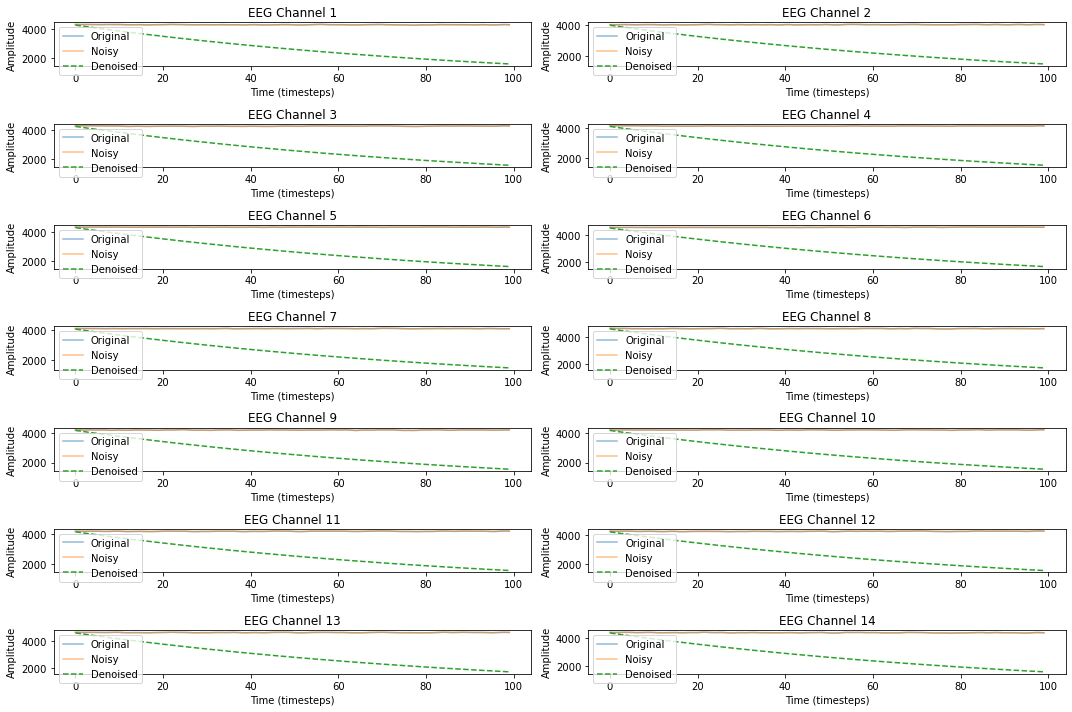

In [17]:
from sklearn.datasets import fetch_openml
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

# 1. Load EEG Eye State data
data = fetch_openml(name='eeg-eye-state', version=1, as_frame=False)
X = data.data[0:100]  # Shape: (14980, 14)
X_dask = da.from_array(X, chunks=(1000, 14))
print(f"Data shape: {X_dask.shape}")

# 2. Add Synthetic Noise
noise_level = 0.5  # Adjust noise intensity
noisy_X_dask = X_dask + da.random.normal(0, noise_level, X_dask.shape, chunks=X_dask.chunks)

# 3. Particle Filter Setup
n_features = 14  # 14 EEG channels
F = np.eye(n_features) * 0.99  # Slow drift (near-static transition)
H = np.eye(n_features)  # Direct observation
Q = np.eye(n_features) * 0.01  # Process noise
R = np.eye(n_features) * 0.1   # Observation noise
initial_state = X[0]           # First timestep as initial state

pf = DaskParticleFilter(
    state_transition=F,
    observation_model=H,
    process_noise_cov=Q,
    observation_noise_cov=R,
    initial_state=initial_state,
    num_particles=1000,
    use_dask=True,
    estimation_strategy="residual_analysis"
)

# 4. Run Filter to Denoise
state_estimates, residuals = pf.run_filter(noisy_X_dask)
denoised_X = state_estimates.compute()  # Shape: (14980, 14)

# 5. Evaluate
mse = np.mean((X - denoised_X) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

# 6. Visualize (first 1000 timesteps, all channels)
subset_size = 1000
X_subset = X[:subset_size]
noisy_subset = noisy_X_dask[:subset_size].compute()
denoised_subset = denoised_X[:subset_size]

plt.figure(figsize=(15, 10))
for i in range(14):
    plt.subplot(7, 2, i + 1)
    plt.plot(X_subset[:, i], label="Original", alpha=0.5)
    plt.plot(noisy_subset[:, i], label="Noisy", alpha=0.5)
    plt.plot(denoised_subset[:, i], label="Denoised", linestyle="--")
    plt.title(f"EEG Channel {i+1}")
    plt.xlabel("Time (timesteps)")
    plt.ylabel("Amplitude")
    plt.legend()
plt.tight_layout()
plt.show()


---

# Using Particle Filters for NLP Topic Denoising/Tracking

## Purpose
Particle Filters denoise or track topic distributions in NLP (e.g., from tweets) by estimating the true topic probabilities over a sequence of texts from noisy observations. For disaster tweets, this smooths noisy topic signals (e.g., from LDA), revealing clearer trends in themes like "disaster" or "news" over time.

- **Why Particle Filters?** They use a particle-based approach to handle non-Gaussian noise and evolving topic dynamics, offering flexibility over traditional filters.

## Methodology
For NLP topic distributions (e.g., 5 topics over tweet sequence):
1. **Model the Topics**: Treat topic probabilities as a state vector (e.g., 5D), evolving with a transition model (e.g., slight decay).
2. **Noise in Data**: Noise arises from text variability, preprocessing, or LDA sampling.
3. **Filter**: Propagate particles, update weights with observed topic distributions, resample, and estimate smoothed states.

### Key Equations
1. **State Transition (Prediction)**:
   - \( x_k^i = F x_{k-1}^i + w_k^i \), \( i = 1, ..., N \)
   - \( x_k^i \): State of particle \( i \) at time \( k \) (e.g., 5D topic vector).
   - \( F \): Transition matrix (e.g., \( 0.95 \cdot I \) for smooth decay).
   - \( w_k^i \sim \mathcal{N}(0, Q) \): Process noise, covariance \( Q \) (5x5).
   - \( N \): Number of particles (e.g., 1000).

2. **Observation Model**:
   - \( z_k = H x_k^i + v_k^i \)
   - \( z_k \): Noisy observation (raw topic probabilities).
   - \( H \): Observation matrix (e.g., \( I \) for direct observation).
   - \( v_k^i \sim \mathcal{N}(0, R) \): Observation noise, covariance \( R \) (5x5).

3. **Weight Update**:
   - \( w_k^i \propto p(z_k | x_k^i) = \exp\left(-\frac{1}{2} (z_k - H x_k^i)^T R^{-1} (z_k - H x_k^i)\right) \)
   - Normalize: \( w_k^i = w_k^i / \sum_{j=1}^N w_k^j \).

4. **Resampling**:
   - Resample \( N \) particles from \( \{x_k^i\} \) with probabilities \( \{w_k^i\} \).

5. **State Estimation**:
   - \( \hat{x}_k = \frac{1}{N} \sum_{i=1}^N x_k^i \) (average over particles).

## How to Use (Based on Your Tweet Code)
1. **Prepare Data**:
   - Load tweets (e.g., 50 disaster tweets).
   - Extract topics: Use `CountVectorizer` and `LatentDirichletAllocation` to get `topic_dist` (shape: 50x5).
   - Convert to Dask: `X_dask = da.from_array(topic_dist, chunks=(100, 5))`.

2. **Set Up Particle Filter**:
   - Define parameters:
     - \( F = 0.95 \cdot I_5 \) (slight decay for topic evolution).
     - \( H = I_5 \) (direct observation).
     - \( Q = 0.01 \cdot I_5 \) (process noise).
     - \( R = 0.1 \cdot I_5 \) (observation noise).
     - \( x_0 = \) first tweet’s topics (initial state).
   - Initialize: `pf = DaskParticleFilter(F, H, Q, R, initial_state, num_particles=1000, use_dask=True)`.

3. **Track/Denoise Topics**:
   - Run filter: `state_estimates, _ = pf.run_filter(X_dask)`.
   - Compute: `smoothed_topics = state_estimates.compute()` (shape: 50x5).

4. **Evaluate**:
   - Plot raw vs. smoothed topics for each of the 5 topics over 50 tweets.
   - Interpret topics using top words from LDA components.

## Example Output
- **Plots**: Raw (noisy) vs. Filtered (smoothed) topic probabilities over tweet index.
- **Topics**: e.g., Topic 1: "earthquake, flood, help, disaster, emergency".
- **Parameters**: Estimated \( Q \) and \( R \) reflect noise characteristics.

## Notes
- **NLP Fit**: \( F < I \) (e.g., 0.95) models gradual topic shifts; adjust for faster/slower dynamics.
- **Scalability**: Dask chunks (e.g., 100x5) handle large tweet datasets efficiently.
- **Extensions**: Apply to LLM embeddings (e.g., 768D BERT vectors) by scaling dimensions.
- **Tuning**: Adjust \( Q \), \( R \), and `num_particles` for noise level and smoothness.
- **Nonlinear Option**: Particle Filters excel with non-Gaussian noise; extend \( F \) or \( H \) for complex topic shifts.

---


Number of tweets: 150
Topic distribution shape: (150, 5)


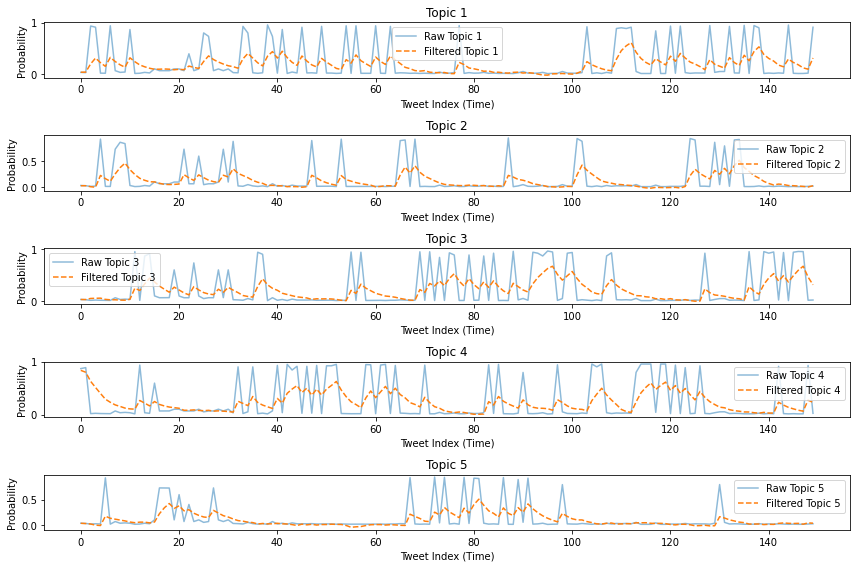

Topic 1: airplane, accident, aftershock, http, ablaze
Topic 2: aftershock, accident, doing, http, ablaze
Topic 3: https, experts, airplane, http, accident
Topic 4: û_, edm, aftershock, ablaze, http
Topic 5: damage, love, fyi, vehicle, accident
Final estimated state: [0.3127254  0.02901741 0.31395371 0.22773381 0.03355229]
Estimated Q: [[ 0.08444191 -0.01755382 -0.02495222 -0.03715394 -0.00609694]
 [-0.01755382  0.05495929 -0.01438488 -0.01526195 -0.00715091]
 [-0.02495222 -0.01438488  0.08626278 -0.02629014 -0.01894367]
 [-0.03715394 -0.01526195 -0.02629014  0.08662003 -0.00817646]
 [-0.00609694 -0.00715091 -0.01894367 -0.00817646  0.04130909]]
Estimated R: [[0.07030458 0.         0.         0.         0.        ]
 [0.         0.07030458 0.         0.         0.        ]
 [0.         0.         0.07030458 0.         0.        ]
 [0.         0.         0.         0.07030458 0.        ]
 [0.         0.         0.         0.         0.07030458]]


In [19]:
import pandas as pd
import numpy as np
import dask.array as da
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
# from your_module import DaskParticleFilter  # Adjust import

# 1. Load Disaster Tweets
data_path = r'C:\Users\thabanglukhetho\Documents\gits\uaie\examples\data\train_nlp.csv'
df = pd.read_csv(data_path)
tweets = df['text'].values[0:150]  # 500 tweets for testing
print(f"Number of tweets: {len(tweets)}")

# 2. Preprocess and Extract Topics
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(tweets)
n_topics = 5  # e.g., disaster, weather, casual, news, other
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
topic_dist = lda.fit_transform(X)  # Shape: (500, 5)
X_dask = da.from_array(topic_dist, chunks=(100, n_topics))  # Adjusted chunks for 500 samples
print(f"Topic distribution shape: {X_dask.shape}")

# 3. Particle Filter Setup
F = np.eye(n_topics) * 0.95  # Slight decay for smooth topic evolution
H = np.eye(n_topics)  # Direct observation
Q = np.eye(n_topics) * 0.01  # Process noise
R = np.eye(n_topics) * 0.1   # Observation noise
initial_state = topic_dist[0]  # First tweet’s topics

pf = DaskParticleFilter(
    state_transition=F,
    observation_model=H,
    process_noise_cov=Q,
    observation_noise_cov=R,
    initial_state=initial_state,
    num_particles=1000,
    use_dask=True,
    estimation_strategy="residual_analysis"
)

# 4. Run Filter to Track Topics
state_estimates, residuals = pf.run_filter(X_dask)
smoothed_topics = state_estimates.compute()  # Shape: (500, 5)

# 5. Plot Raw vs Smoothed Topics (first 500 tweets)
subset_size = 500  # Full set since we’re using 500 tweets
plt.figure(figsize=(12, 8))
for i in range(n_topics):
    plt.subplot(n_topics, 1, i + 1)
    plt.plot(topic_dist[:subset_size, i], label=f"Raw Topic {i+1}", alpha=0.5)
    plt.plot(smoothed_topics[:subset_size, i], label=f"Filtered Topic {i+1}", linestyle="--")
    plt.title(f"Topic {i+1}")
    plt.xlabel("Tweet Index (Time)")
    plt.ylabel("Probability")
    plt.legend()
plt.tight_layout()
plt.show()

# 6. Interpret Topics
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [feature_names[j] for j in topic.argsort()[-5:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")

# 7. Optional: Check Final State and Parameters
print("Final estimated state:", pf.state)
Q_est, R_est = pf.estimate_parameters(X_dask)
print("Estimated Q:", Q_est.compute())
print("Estimated R:", R_est.compute())